In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import time
%matplotlib inline

In [2]:
#Read HTML tables into a list of DataFrame objects.
bitcoin_market_info = pd.read_html("https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20160101&end="+time.strftime("%Y%m%d"))[0]

In [4]:
bitcoin_market_info

,Date,Open,High,Low,Close,Volume,Market Cap
0,2018-02-08,7637.86,8558.77,7637.86,8265.59,9346750000,128714000000
1,2018-02-07,7755.49,8509.11,7236.79,7621.30,9169280000,130683000000
2,2018-02-06,7051.75,7850.70,6048.26,7754.00,13999800000,118810000000
3,2018-02-05,8270.54,8364.84,6756.68,6955.27,9285290000,139325000000
4,2018-02-04,9175.70,9334.87,8031.22,8277.01,7073550000,154553000000
5,2018-02-03,8852.12,9430.75,8251.63,9174.91,7263790000,149085000000
6,2018-02-02,9142.28,9142.28,7796.49,8830.75,12726900000,153953000000
7,2018-02-01,10237.30,10288.80,8812.28,9170.54,9959400000,172372000000
8,2018-01-31,10108.20,10381.60,9777.42,10221.10,8041160000,170183000000
9,2018-01-30,11306.80,11307.20,10036.20,10106.30,8637860000,190339000000


In [3]:
#convert date string to correct format
bitcoin_market_info = bitcoin_market_info.assign(Date=pd.to_datetime(bitcoin_market_info['Date']))

In [15]:
#when volume is equal to '-', set it to 0
bitcoin_market_info.loc[bitcoin_market_info['Volume'] == '-', 'Volume'] = 0 

/Users/shubhvarma/anaconda/envs/py35/lib/python3.5/site-packages/pandas/core/ops.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison

In [16]:
#convert volume to integer value
bitcoin_market_info['Volume'] = bitcoin_market_info['Volume'].astype('int64')

In [17]:
#look at the first few rows
bitcoin_market_info.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2018-01-18,11198.8,12107.3,10942.50,11474.9,15020400000,188242000000
1,2018-01-17,11431.1,11678.0,9402.29,11188.6,18830600000,192123000000
2,2018-01-16,13836.1,13843.1,10194.90,11490.5,18853800000,232517000000
3,2018-01-15,13767.3,14445.5,13641.70,13819.8,12750800000,231334000000
4,2018-01-14,14370.8,14511.8,13268.00,13772.0,11084100000,241447000000


In [18]:
#getting bitcoin logo
import sys
from PIL import Image
import io
import urllib

bt_img = urllib.request.urlopen("http://logok.org/wp-content/uploads/2016/10/Bitcoin-Logo-640x480.png")
image_file = io.BytesIO(bt_img.read())
bitcoin_im = Image.open(image_file)

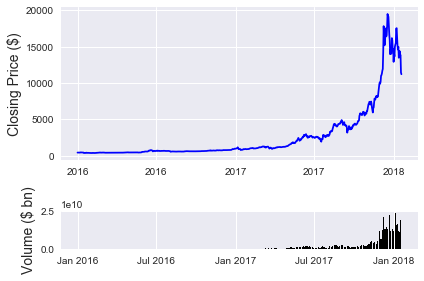

In [19]:
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[4, 1]})
ax1.set_ylabel('Closing Price ($)', fontsize = 14)
ax2.set_ylabel('Volume ($ bn)', fontsize = 14)

ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax2.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax2.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,7]])

ax1.plot(bitcoin_market_info['Date'], bitcoin_market_info['Open'], color = 'blue')
ax2.bar(bitcoin_market_info['Date'].values, bitcoin_market_info['Volume'].values, color = 'black')
fig.tight_layout()
fig.figimage(bitcoin_im, 200, 180, zorder = 3, alpha = .5)
plt.show()

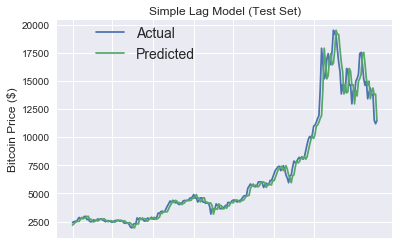

In [20]:
split_date = '2017-06-01'
fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax1.set_xticklabels('')

ax1.plot(bitcoin_market_info[bitcoin_market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
         bitcoin_market_info[bitcoin_market_info['Date']>= split_date]['Close'].values, label='Actual')
ax1.plot(bitcoin_market_info[bitcoin_market_info['Date']>= split_date]['Date'].astype(datetime.datetime),
         bitcoin_market_info[bitcoin_market_info['Date']>= datetime.datetime.strptime(split_date, '%Y-%m-%d') - 
                      datetime.timedelta(days=2)]['Close'][2:].values, label='Predicted')
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
ax1.set_title('Simple Lag Model (Test Set)')

In [27]:
#add volatility -- (high - low)/open, and close of high
kwargs = {'close_off_high' : lambda x: 2*(x['High'] - x['Close']) / (x['High'] - x['Low']) - 1,
          'volatility' :  lambda x: (x['High'] - x['Low'])/x['Open']
         }
model_data = bitcoin_market_info.assign(**kwargs)

In [35]:
#removed some of the previous columns (open price, daily highs and lows) and reformulated some new ones.
model_data = model_data.drop(['Open','High','Low'], axis = 1)

ValueError: labels ['Open' 'High' 'Low'] not contained in axis

In [37]:
model_data.head()

,Date,Close,Volume,Market Cap,close_off_high,volatility
0,2018-01-18,11474.9,15020400000,188242000000,0.085852,0.104011
1,2018-01-17,11188.6,18830600000,192123000000,-0.569892,0.199081
2,2018-01-16,11490.5,18853800000,232517000000,0.289732,0.263673
3,2018-01-15,13819.8,12750800000,231334000000,0.556855,0.058385
4,2018-01-14,13772.0,11084100000,241447000000,0.189580,0.086551


In [ ]:
#normalize inputs
training_set, test_set = model_data[model_data['Date']<split_date], model_data[model_data['Date']>=split_date]
training_set = training_set.drop('Date', 1) #we don't need date column anymore
test_set = test_set.drop('Date', 1)

In [38]:
#build little data frames consisting of 10 consecutive days (called windows)
window_len = 10


In [ ]:
LSTM_training_inputs = []
for i in range(len(training_set) - window_len):
    temp_set = test_set[i:(i+window_let)].copy()
    for col in norm_cols:
        temp_set.loc[: , col]